# Machine Learning with Halifax Data

### Import and modifying the data
Import the classification data and modify it so it is easy to work with.

In [1]:
import pandas as pd

hali_data = pd.read_csv('ClassData.csv')

cols = list(hali_data)
cols.insert(len(cols), cols.pop(cols.index('Labels')))
cols
hali_data = hali_data.ix[:,cols]
hali_data.rename(columns = {'Labels':'class'}, inplace = True)
hali_data.head()

,T2,Ktrans,ADC,class
0,2052.01,0.139512,1124.6060,0
1,2364.01,0.151337,1126.1040,0
2,1526.01,0.001736,1011.6790,0
3,2660.01,0.343637,1111.4160,0
4,1459.01,0.091344,994.9805,0


In [2]:
hali_data.loc[hali_data['class'] == 0, 'class'] = 'Non-Cancer'
hali_data.loc[hali_data['class'] == 1, 'class'] = 'Cancer'
hali_data.describe()

,T2,Ktrans,ADC
count,795837.000000,795837.000000,795837.000000
mean,1610.516336,0.164566,1137.581457
std,641.670564,0.133525,209.058977
min,2.010000,-0.008000,303.793500
25%,1135.010000,0.078493,1003.866000
50%,1540.010000,0.138217,1129.263000
75%,2002.010000,0.214749,1261.122000
max,5332.010000,2.952276,2294.320000


### Scaterplot Matrix
Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. 

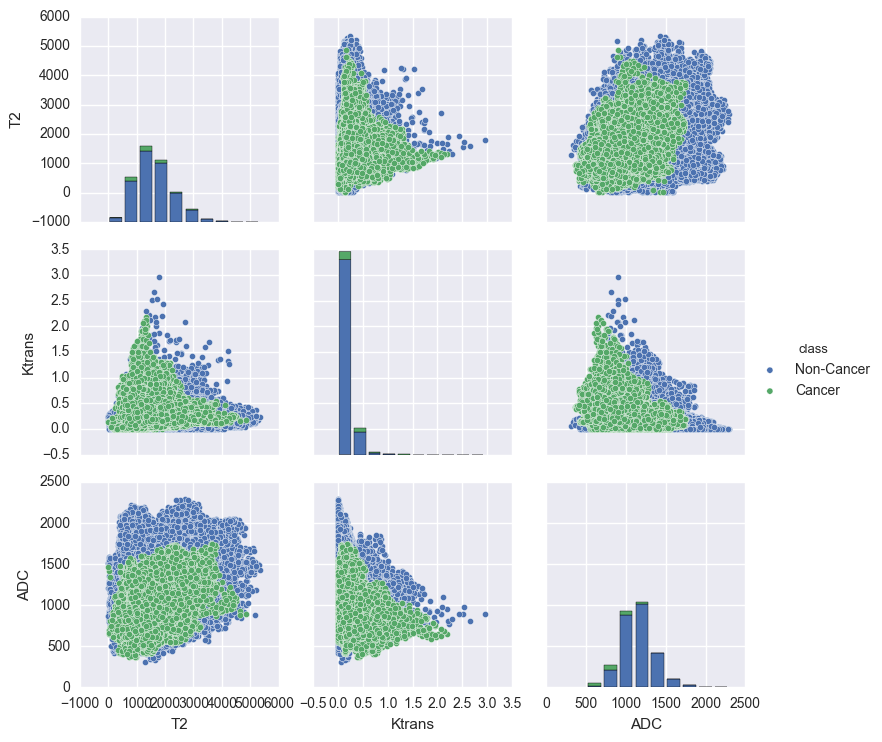

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(hali_data.dropna(), hue='class')

In [4]:
## Save the modified data for future use.
hali_data.to_csv('hali-class-data.csv', index=False)

hali_data = pd.read_csv('hali-class-data.csv')
hali_data.head()

,T2,Ktrans,ADC,class
0,2052.01,0.139512,1124.6060,Non-Cancer
1,2364.01,0.151337,1126.1040,Non-Cancer
2,1526.01,0.001736,1011.6790,Non-Cancer
3,2660.01,0.343637,1111.4160,Non-Cancer
4,1459.01,0.091344,994.9805,Non-Cancer


### Violin Plot
Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

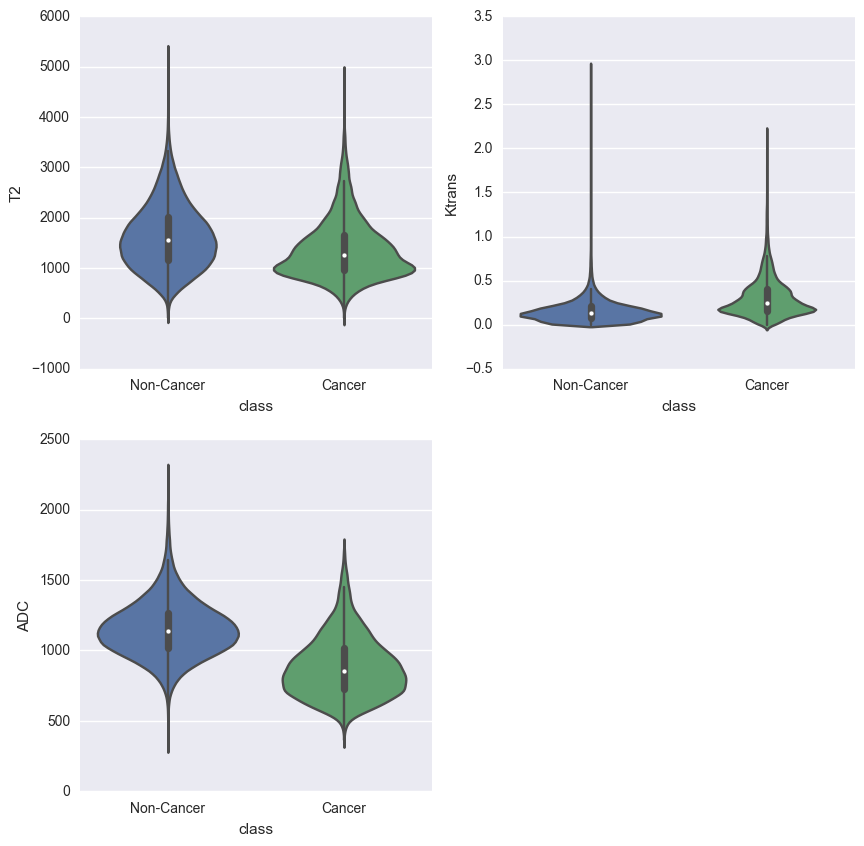

In [46]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(hali_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=hali_data)

In [48]:
## Convert Data frame to array
all_inputs = hali_data[list(hali_data)[:-1]].values
all_classes = hali_data['class'].values
all_inputs[:5]

array([[  2.05201000e+03,   1.39511700e-01,   1.12460600e+03],
       [  2.36401000e+03,   1.51337200e-01,   1.12610400e+03],
       [  1.52601000e+03,   1.73630400e-03,   1.01167900e+03],
       [  2.66001000e+03,   3.43636600e-01,   1.11141600e+03],
       [  1.45901000e+03,   9.13442700e-02,   9.94980500e+02]])

In [49]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)


### Stratified k-fold cross-validation decision tree classifier

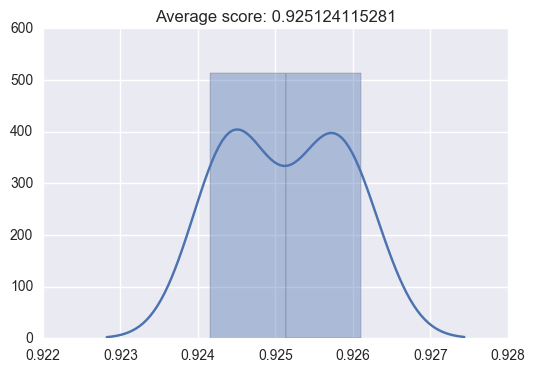

In [51]:
import numpy as np
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### Grid search 
Explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

In [61]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.952808175543
Best parameters: {'max_features': 3, 'max_depth': 5}


#### Grid search visualization

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


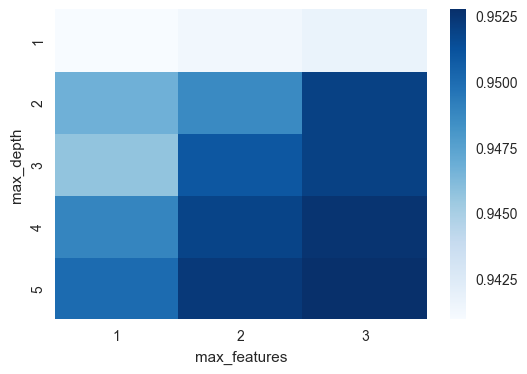

In [63]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 3)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [54]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.953117284067
Best parameters: {'max_features': 3, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 5}


In [59]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Spread of accuracies

A striplot drawa strips of observations on top of a box plot:

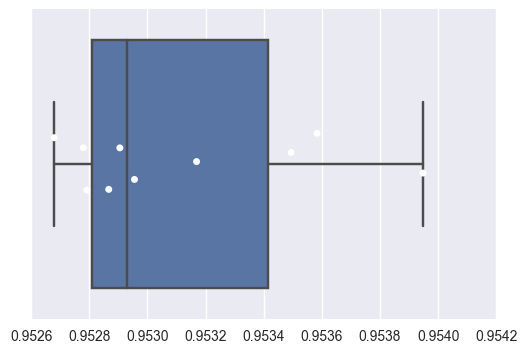

In [60]:
rf_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sb.boxplot(rf_scores)
sb.stripplot(rf_scores, jitter=True, color='white')